# Split-band imaging

W51-E B3 has shown disastrously bad artifacts.  This notebook will explore whether we can fix those by splitting the imaging up.

In [1]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [2]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [5]:
original_ms = "W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_selfcal.ms"

In [6]:
msmd.open(original_ms)

True

In [7]:
msmd.spwsforfield('W51-E')

array([12, 13, 14, 15, 16, 17, 18, 19, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int32)

In [9]:
low_spws = [spw for spw in msmd.spwsforfield('W51-E') if np.all(msmd.chanfreqs(spw) < 9.5e10)]
high_spws = [spw for spw in msmd.spwsforfield('W51-E') if np.all(msmd.chanfreqs(spw) > 9.5e10)]
print(low_spws, high_spws)

[12, 13, 16, 17, 28, 29, 32, 33, 36, 37, 40, 41, 44, 45] [14, 15, 18, 19, 30, 31, 34, 35, 38, 39, 42, 43, 46, 47]


In [10]:
msmd.close()

True

In [11]:
split(vis=original_ms, outputvis='W51-E_B3_selfcal_93GHz.ms', spw=','.join(map(str, low_spws)))

True

In [12]:
split(vis=original_ms, outputvis='W51-E_B3_selfcal_100GHz.ms', spw=','.join(map(str, high_spws)))

True

In [13]:
tclean(vis="W51-E_B3_selfcal_93GHz.ms",
       selectdata=True, field="W51-E", spw="", timerange="", uvrange="",
       antenna="DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA61,DA62,DA63,DA65,DV01,DV03,DV04,DV06,DV07,DV08,DV09,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV23,DV24,DV25,PM01,PM02,PM03,DA60,DA64,DV05,DV22,DA48,DA49,DA51,DA60,DV01,DV15,DV23,PM03,PM04,DA53,DA46,DV10,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21",
       scan="", observation="", intent="", datacolumn="corrected",
       imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_dirty",
       imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
       phasecenter="ICRS 290.934083333deg 14.5081943683deg",
       stokes="I",
       projection="SIN",
       startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
                   'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       specmode="mfs", reffreq="", nchan=-1, start="",
       width="", outframe="LSRK", veltype="radio", restfreq=[],
       interpolation="linear", perchanweightdensity=True, gridder="mosaic",
       facets=1, chanchunks=1, wprojplanes=1, vptable="",
       mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False,
       cfcache="", usepointing=False, computepastep=360.0, rotatepastep=360.0,
       pointingoffsetsigdev=[], pblimit=0.1, normtype="flatnoise",
       deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, smallscalebias=0.0,
       restoration=True, restoringbeam=[], pbcor=True, outlierfile="",
       weighting="briggs", robust=0, noise="1.0Jy", npixels=0, uvtaper=[],
       niter=0, gain=0.1, threshold="0.15mJy", nsigma=0.0, cycleniter=-1,
       cyclefactor=1.0, minpsffraction=0.05, maxpsffraction=0.8,
       interactive=False, usemask="user",
       mask="../reduction/reduction/noise_estimation_regions/W51E_Bright.crtf",
       pbmask=0.0,
       sidelobethreshold=3.0, noisethreshold=5.0, lownoisethreshold=1.5,
       negativethreshold=0.0, smoothfactor=1.0, minbeamfrac=0.3,
       cutthreshold=0.01, growiterations=75, dogrowprune=True,
       minpercentchange=-1.0, verbose=False, fastnoise=True, restart=True,
       savemodel="none", calcres=True, calcpsf=True, parallel=False)

{}

In [14]:
tclean(vis="W51-E_B3_selfcal_100GHz.ms",
       selectdata=True, field="W51-E", spw="", timerange="", uvrange="",
       antenna="DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA61,DA62,DA63,DA65,DV01,DV03,DV04,DV06,DV07,DV08,DV09,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV23,DV24,DV25,PM01,PM02,PM03,DA60,DA64,DV05,DV22,DA48,DA49,DA51,DA60,DV01,DV15,DV23,PM03,PM04,DA53,DA46,DV10,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21",
       scan="", observation="", intent="", datacolumn="corrected",
       imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_dirty",
       imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
       phasecenter="ICRS 290.934083333deg 14.5081943683deg",
       stokes="I",
       projection="SIN",
       startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
                   'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       specmode="mfs", reffreq="", nchan=-1, start="",
       width="", outframe="LSRK", veltype="radio", restfreq=[],
       interpolation="linear", perchanweightdensity=True, gridder="mosaic",
       facets=1, chanchunks=1, wprojplanes=1, vptable="",
       mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False,
       cfcache="", usepointing=False, computepastep=360.0, rotatepastep=360.0,
       pointingoffsetsigdev=[], pblimit=0.1, normtype="flatnoise",
       deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, smallscalebias=0.0,
       restoration=True, restoringbeam=[], pbcor=True, outlierfile="",
       weighting="briggs", robust=0, noise="1.0Jy", npixels=0, uvtaper=[],
       niter=0, gain=0.1, threshold="0.15mJy", nsigma=0.0, cycleniter=-1,
       cyclefactor=1.0, minpsffraction=0.05, maxpsffraction=0.8,
       interactive=False, usemask="user",
       mask="../reduction/reduction/noise_estimation_regions/W51E_Bright.crtf",
       pbmask=0.0,
       sidelobethreshold=3.0, noisethreshold=5.0, lownoisethreshold=1.5,
       negativethreshold=0.0, smoothfactor=1.0, minbeamfrac=0.3,
       cutthreshold=0.01, growiterations=75, dogrowprune=True,
       minpercentchange=-1.0, verbose=False, fastnoise=True, restart=True,
       savemodel="none", calcres=True, calcpsf=True, parallel=False)

{}

In [15]:
import sys
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from diagnostic_images import load_images, show

In [22]:
imgs, cubes = load_images("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_dirty", suffix='')
imgs

{'image': <Slice [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]] Jy / beam>,
 'model': <Quantity [[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]] Jy / beam>,
 'residual': <Slice [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]>,
 'includemask': <spectral_cube.masks.LazyComparisonMa

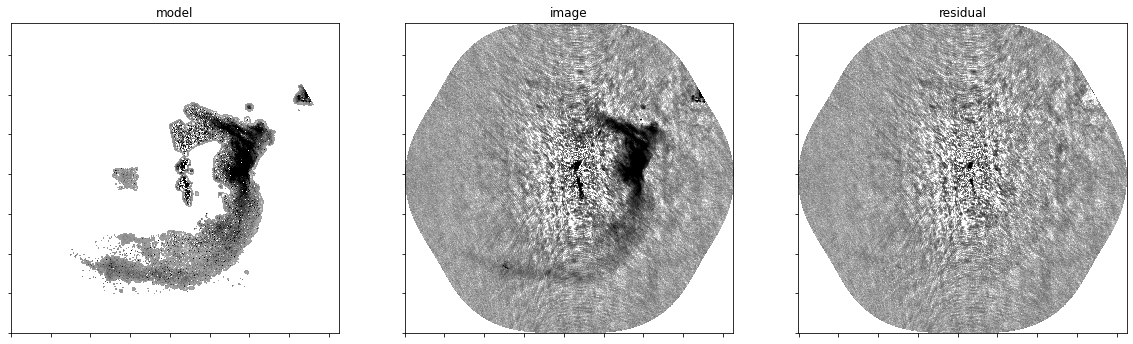

In [26]:
pl.figure(figsize=(20,10))
show(imgs, norm=simple_norm(imgs['image'], stretch='asinh', max_percent=99, min_percent=2))

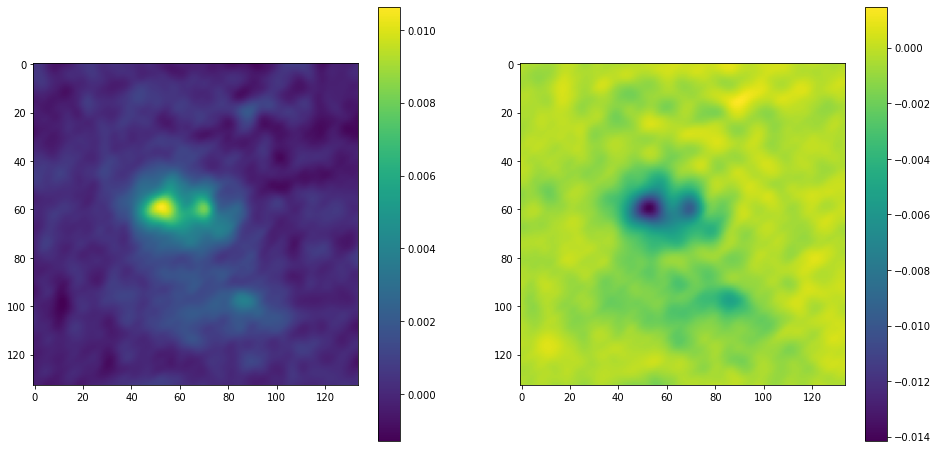

In [29]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
high_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_dirty.residual.tt0", format='casa_image')
low_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_dirty.residual.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()

In [7]:
tclean(vis="W51-E_B3_selfcal_93GHz.ms",
       selectdata=True, field="W51-E", spw="", timerange="", uvrange="",
       antenna="DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA61,DA62,DA63,DA65,DV01,DV03,DV04,DV06,DV07,DV08,DV09,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV23,DV24,DV25,PM01,PM02,PM03,DA60,DA64,DV05,DV22,DA48,DA49,DA51,DA60,DV01,DV15,DV23,PM03,PM04,DA53,DA46,DV10,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21",
       scan="", observation="", intent="", datacolumn="corrected",
       imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean",
       imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
       phasecenter="ICRS 290.934083333deg 14.5081943683deg",
       stokes="I",
       projection="SIN",
       startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
                   'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       specmode="mfs", reffreq="", nchan=-1, start="",
       width="", outframe="LSRK", veltype="radio", restfreq=[],
       interpolation="linear", perchanweightdensity=True, gridder="mosaic",
       facets=1, chanchunks=1, wprojplanes=1, vptable="",
       mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False,
       cfcache="", usepointing=False, computepastep=360.0, rotatepastep=360.0,
       pointingoffsetsigdev=[], pblimit=0.1, normtype="flatnoise",
       deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, smallscalebias=0.0,
       restoration=True, restoringbeam=[], pbcor=True, outlierfile="",
       weighting="briggs", robust=0, noise="1.0Jy", npixels=0, uvtaper=[],
       niter=50000, gain=0.1, threshold="0.15mJy", nsigma=0.0, cycleniter=-1,
       cyclefactor=1.0, minpsffraction=0.05, maxpsffraction=0.8,
       interactive=False, usemask="user",
       mask="../reduction/reduction/clean_regions//W51E_Bright.crtf",
       pbmask=0.0,
       sidelobethreshold=3.0, noisethreshold=5.0, lownoisethreshold=1.5,
       negativethreshold=0.0, smoothfactor=1.0, minbeamfrac=0.3,
       cutthreshold=0.01, growiterations=75, dogrowprune=True,
       minpercentchange=-1.0, verbose=False, fastnoise=True, restart=True,
       savemodel="none", calcres=True, calcpsf=True, parallel=False)

{}

In [ ]:
tclean(vis="W51-E_B3_selfcal_100GHz.ms",
       selectdata=True, field="W51-E", spw="", timerange="", uvrange="",
       antenna="DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA61,DA62,DA63,DA65,DV01,DV03,DV04,DV06,DV07,DV08,DV09,DV10,DV11,DV12,DV13,DV14,DV15,DV16,DV17,DV19,DV20,DV23,DV24,DV25,PM01,PM02,PM03,DA60,DA64,DV05,DV22,DA48,DA49,DA51,DA60,DV01,DV15,DV23,PM03,PM04,DA53,DA46,DV10,DA42,DA43,DA44,DA45,DA46,DA47,DA50,DA51,DA55,DA56,DA57,DA58,DA61,DA62,DV02,DV03,DV07,DV11,DV12,DV14,DV19,DV21",
       scan="", observation="", intent="", datacolumn="corrected",
       imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean",
       imsize=[4800,  4800], cell=['0.0375arcsec',  '0.0375arcsec'],
       phasecenter="ICRS 290.934083333deg 14.5081943683deg",
       stokes="I",
       projection="SIN",
       startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt0',
                   'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7.model.tt1'],
       specmode="mfs", reffreq="", nchan=-1, start="",
       width="", outframe="LSRK", veltype="radio", restfreq=[],
       interpolation="linear", perchanweightdensity=True, gridder="mosaic",
       facets=1, chanchunks=1, wprojplanes=1, vptable="",
       mosweight=True, aterm=True, psterm=False, wbawp=True, conjbeams=False,
       cfcache="", usepointing=False, computepastep=360.0, rotatepastep=360.0,
       pointingoffsetsigdev=[], pblimit=0.1, normtype="flatnoise",
       deconvolver="mtmfs", scales=[0,  3,  9], nterms=2, smallscalebias=0.0,
       restoration=True, restoringbeam=[], pbcor=True, outlierfile="",
       weighting="briggs", robust=0, noise="1.0Jy", npixels=0, uvtaper=[],
       niter=50000, gain=0.1, threshold="0.15mJy", nsigma=0.0, cycleniter=-1,
       cyclefactor=1.0, minpsffraction=0.05, maxpsffraction=0.8,
       interactive=False, usemask="user",
       mask="../reduction/reduction/clean_regions//W51E_Bright.crtf",
       pbmask=0.0,
       sidelobethreshold=3.0, noisethreshold=5.0, lownoisethreshold=1.5,
       negativethreshold=0.0, smoothfactor=1.0, minbeamfrac=0.3,
       cutthreshold=0.01, growiterations=75, dogrowprune=True,
       minpercentchange=-1.0, verbose=False, fastnoise=True, restart=True,
       savemodel="none", calcres=True, calcpsf=True, parallel=False)

In [21]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L


In [22]:
ls -d imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_*freq_brightmask_clean*

imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.alpha/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.alpha.error/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.alpha.pbcor/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0.pbcor/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt1/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt1.pbcor/
imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_

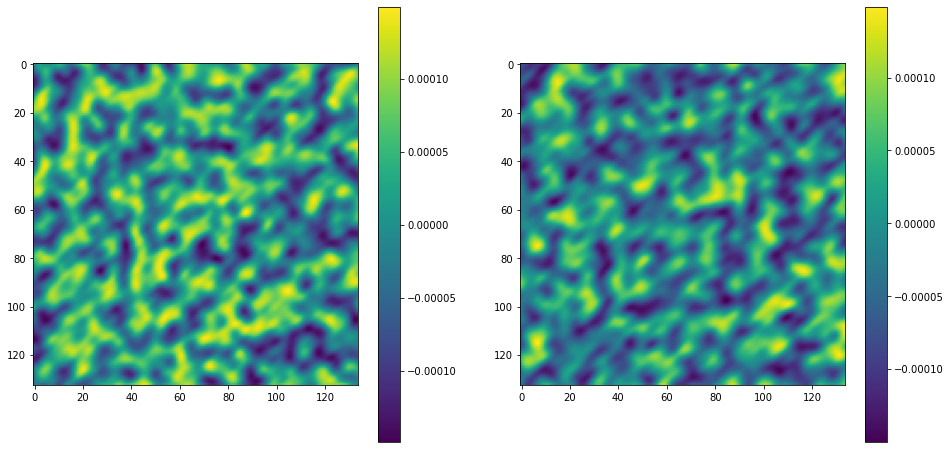

In [32]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
high_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.residual.tt0", format='casa_image')
low_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.residual.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()

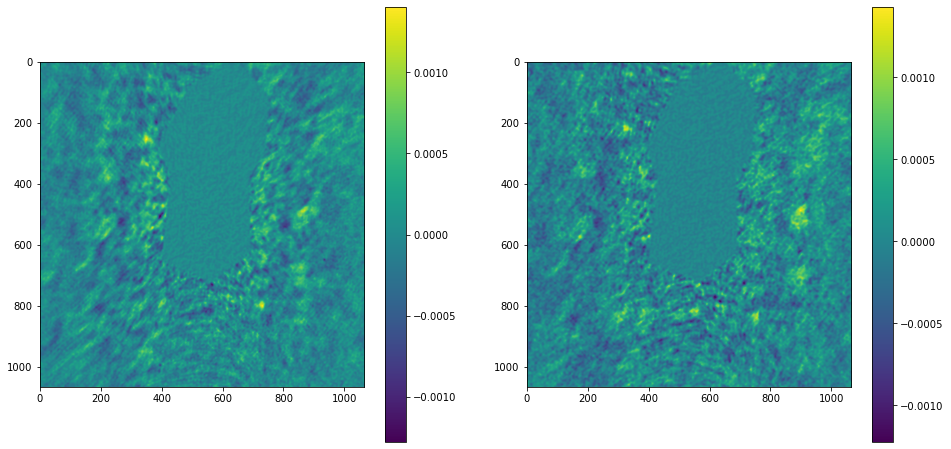

In [41]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,40",40")'
high_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.residual.tt0", format='casa_image')
low_resid_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.residual.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_resid_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im)); pl.colorbar()

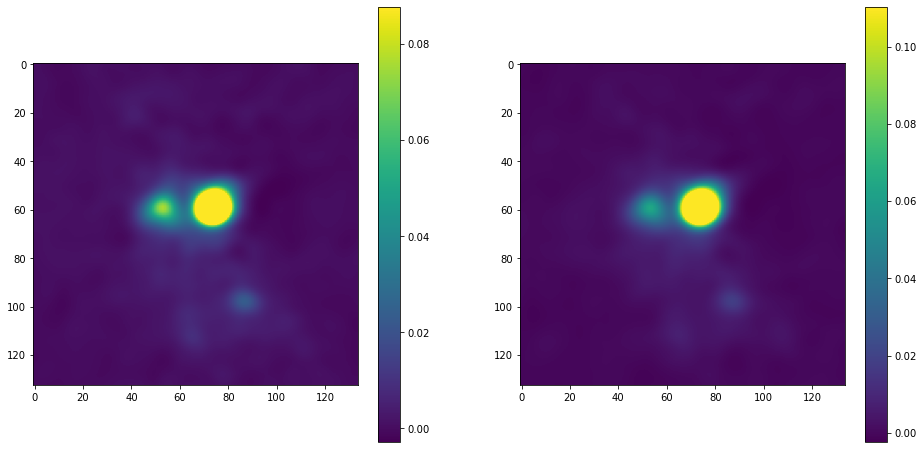

In [36]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
high_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0", format='casa_image')
low_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.image.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()

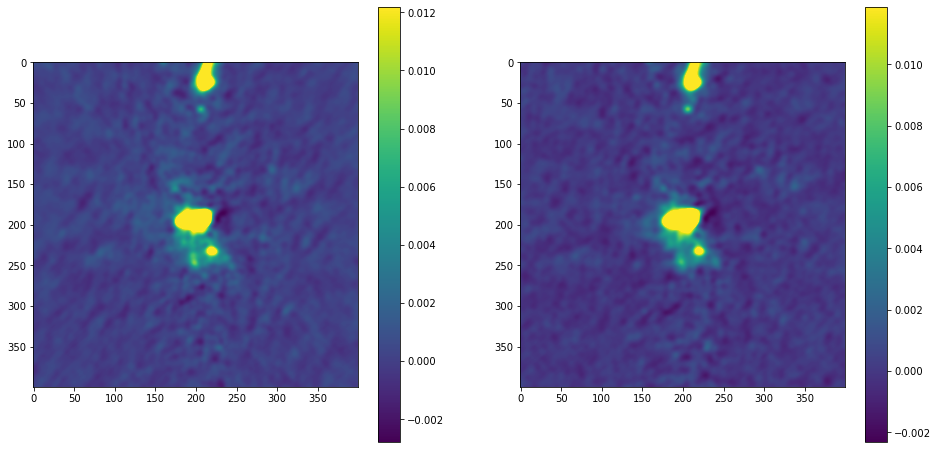

In [37]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,15",15")'
high_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0", format='casa_image')
low_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.image.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()

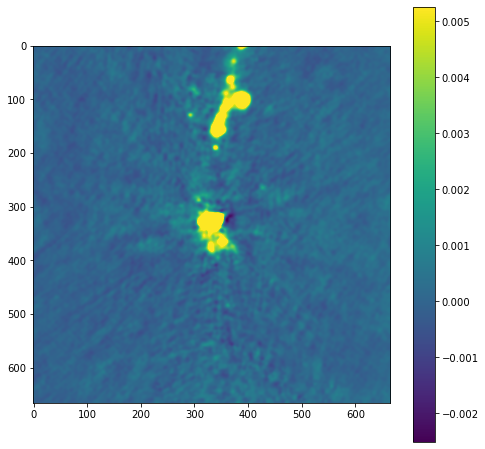

In [42]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,25",25")'
origimg = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0", format='casa_image')
pl.figure(figsize=(8,8))
ax = pl.subplot(1,1,1); im=origimg.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()

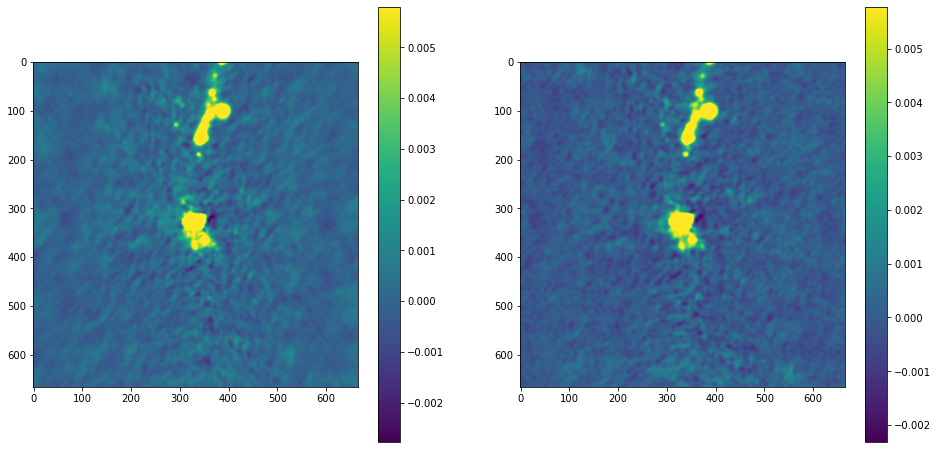

In [38]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,25",25")'
high_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0", format='casa_image')
low_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.image.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


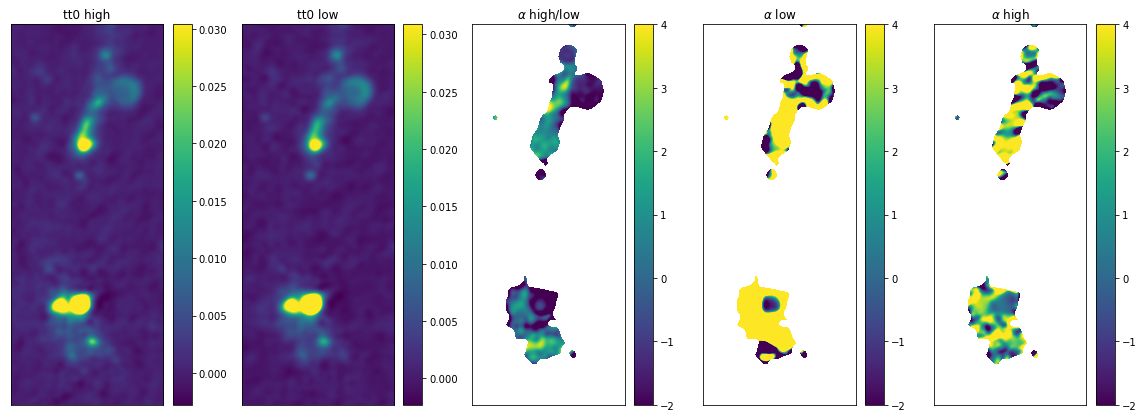

In [70]:
cutoutregion = 'fk5; box(19:23:43.89,+14:30:31.0,6",15")'
high_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt0", format='casa_image')
low_image_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.image.tt0", format='casa_image')
pl.figure(figsize=(20,7))
ax = pl.subplot(1,5,1); im=high_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar(); pl.title("tt0 high"); ax.set_xticks([]); ax.set_yticks([]);
ax = pl.subplot(1,5,2); im=low_image_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar(); pl.title("tt0 low"); ax.set_xticks([]); ax.set_yticks([]);
ax = pl.subplot(1,5,3); im1=low_image_tt0.subcube_from_ds9region(cutoutregion)[0].value;im2=high_image_tt0.subcube_from_ds9region(cutoutregion)[0].value;
ratio = im1/im2
alpha = np.log(ratio) / np.log(low_image_tt0.spectral_axis / high_image_tt0.spectral_axis)
alpha[(im1<0.003)] = np.nan
pl.imshow(alpha, vmin=-2, vmax=4); pl.colorbar(); pl.title("$\\alpha$ high/low"); ax.set_xticks([]); ax.set_yticks([]);
pl.subplots_adjust(hspace=0.05)
alpha_low = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.alpha", format='casa_image')
alpha_high = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.alpha", format='casa_image')
ax = pl.subplot(1,5,4); im=alpha_low.subcube_from_ds9region(cutoutregion)[0].value; im[(im1<0.003)] = np.nan; pl.imshow(im, vmin=-2, vmax=4); pl.colorbar(); pl.title("$\\alpha$ low"); ax.set_xticks([]); ax.set_yticks([]);
ax = pl.subplot(1,5,5); im=alpha_high.subcube_from_ds9region(cutoutregion)[0].value; im[(im1<0.003)] = np.nan; pl.imshow(im, vmin=-2, vmax=4); pl.colorbar(); pl.title("$\\alpha$ high"); ax.set_xticks([]); ax.set_yticks([]);

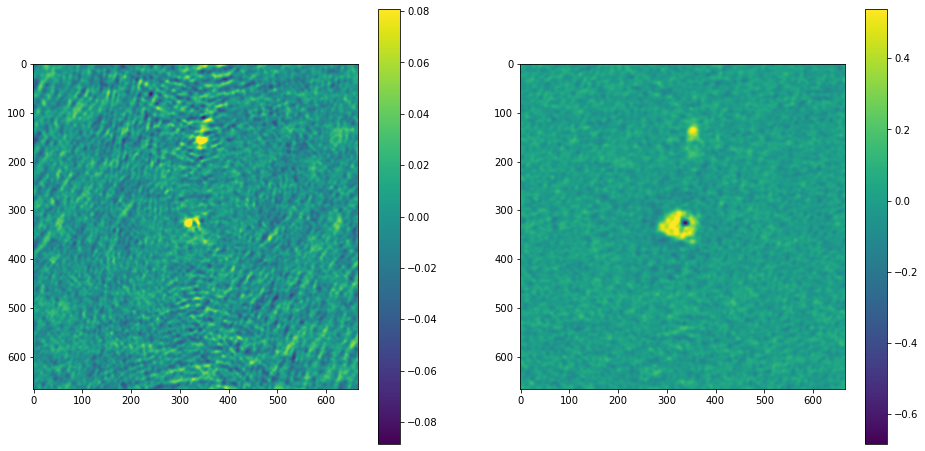

In [52]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,25",25")'
high_image_tt1 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.image.tt1", format='casa_image')
low_image_tt1 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.image.tt1", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_image_tt1.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99.9)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_image_tt1.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99.9)); pl.colorbar()

In [53]:
high_image_tt0.spectral_axis, low_image_tt0.spectral_axis

(<Quantity [1.0376925e+11] Hz>, <Quantity [9.24763718e+10] Hz>)

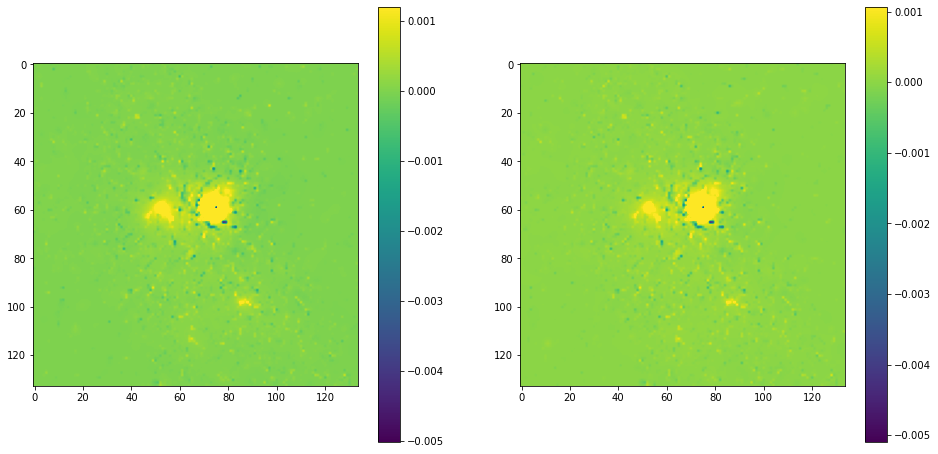

In [33]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,5",5")'
high_mod_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.model.tt0", format='casa_image')
low_mod_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.model.tt0", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_mod_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_mod_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im, norm=simple_norm(im, max_percent=99)); pl.colorbar()

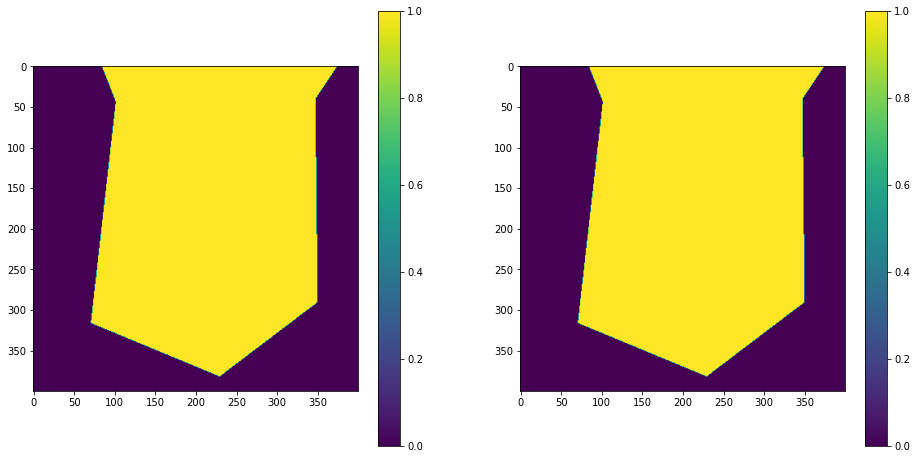

In [35]:
cutoutregion = 'fk5; box(19:23:43.93,+14:30:34.8,15",15")'
high_mask_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_highfreq_brightmask_clean.mask", format='casa_image')
low_mask_tt0 = SpectralCube.read("imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_lowfreq_brightmask_clean.mask", format='casa_image')
pl.figure(figsize=(16,8))
ax = pl.subplot(1,2,1); im=high_mask_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im,); pl.colorbar()
ax = pl.subplot(1,2,2); im=low_mask_tt0.subcube_from_ds9region(cutoutregion)[0].value; pl.imshow(im,); pl.colorbar()

In [26]:
rm -r imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_*freq_brightmask_clean.mask

In [27]:
rm -r imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter_*freq_brightmask_clean.model.tt*